In [796]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [797]:
df = pd.read_csv('first measurments.csv')

In [798]:
df = df.drop([0,1,2,3])

In [799]:
df = df.drop('-10', axis=1)

In [800]:
df = df.rename(columns={'MIN=0':'Time','-20':'Temperature 1 (C)', '-20.1':'Temperature 2 (C)' })
df = df.reset_index()

In [801]:
df = df.drop('index', axis=1)


In [802]:
df = df.drop_duplicates(subset=['Temperature 1 (C)','Temperature 2 (C)'],keep= 'first',ignore_index=True)

In [803]:
df.info

<bound method DataFrame.info of         Time Temperature 1 (C) Temperature 2 (C)
0          0       19.86409043       20.57348241
1        0.2       19.96645621       20.57348241
2        0.3       19.96645621       20.67458442
3        0.7       19.86409043       20.67458442
4      0.899       19.86409043       20.77568643
..       ...               ...               ...
757    205.2       31.94076358       22.03276642
758  205.799       31.73855956       22.03276642
759    205.9       31.83966157        21.9316644
760  206.999       31.88347206        21.9316644
761  207.601       31.68126804        21.9316644

[762 rows x 3 columns]>

In [804]:
df = df.drop(index=range(133,173))
df = df.apply(pd.to_numeric, errors='coerce')
df.info

<bound method DataFrame.info of         Time  Temperature 1 (C)  Temperature 2 (C)
0      0.000          19.864090          20.573482
1      0.200          19.966456          20.573482
2      0.300          19.966456          20.674584
3      0.700          19.864090          20.674584
4      0.899          19.864090          20.775686
..       ...                ...                ...
757  205.200          31.940764          22.032766
758  205.799          31.738560          22.032766
759  205.900          31.839662          21.931664
760  206.999          31.883472          21.931664
761  207.601          31.681268          21.931664

[722 rows x 3 columns]>

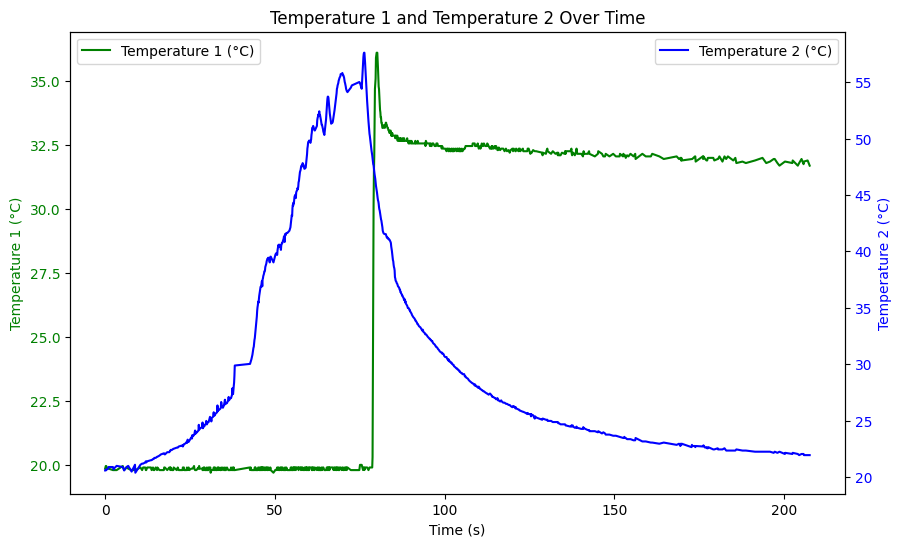

In [805]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Temperature 1 (°C)', color='green')
ax1.plot(df['Time'], df['Temperature 1 (C)'], color='green', label='Temperature 1 (°C)')
ax1.tick_params(axis='y', labelcolor='green')
ax2 = ax1.twinx()
ax2.set_ylabel('Temperature 2 (°C)', color='blue')
ax2.plot(df['Time'], df['Temperature 2 (C)'], color='blue', label='Temperature 2 (°C)')
ax2.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Temperature 1 and Temperature 2 Over Time')
plt.show()